In [3]:
from sklearn.metrics import *
import numpy as np

In [4]:
def ams(pred,gt, weights):
    #TODO: use original weights and scale by (fraction of total events of used)
    pred = convert_bool_or_conf_to_int(pred)
    br = 10
    #weighted true positives
    s = sum([weights[i] if gt[i]==1. and pred[i]==1. else 0. for i in range(gt.shape[0])])

    #weighted false postivies
    b = sum([weights[i] if gt[i]==0. and pred[i]==1. else 0. for i in range(gt.shape[0])])
    ams = np.sqrt(2 * ((s+b+br)*np.log(1 + (s / (b+br))) - s))
    return dict(ams=ams)

def bg_rej_sig_eff(pred,gt,weights):
    
 
    pred = convert_bool_or_conf_to_int(pred)
    #of the real backgrounds, how many did you guess were backgrounds
    
    preds_bg = pred[gt==0.]
    weights_bg = weights[gt==0.]
    
    num_bg_rej = preds_bg[preds_bg ==0.].shape[0]
    
    weighted_bg_rej_arr = weights_bg[preds_bg ==0.]
    
    #how many actual backgrounds
    num_bg = gt[gt==0].shape[0]
    
    weighted_num_bg = np.sum(weights_bg)
    
    weighted_bg_rej = np.sum(weighted_bg_rej_arr) / weighted_num_bg
    

    
    #percent of backgrounds guessed as bg (recall for bg)
    bg_rej = float(num_bg_rej) / num_bg
    
    # of the signals, how many did you guess as signal
    preds_sig = pred[gt==1.]
    weights_sig = weights[gt==1.]
    num_sig_sel = preds_sig[preds_sig==1.].shape[0]
    weighted_sig_sel_arr = weights_sig[preds_sig == 1.]
    
    #how many actual signals
    num_sig = gt[gt==1].shape[0]
    weighted_sum_sig = np.sum(weights_sig) if num_sig > 0 else np.inf
    weighted_sig_eff = np.sum(weighted_sig_sel_arr) / weighted_sum_sig if num_sig > 0 else np.inf
    sig_eff = float(num_sig_sel) / num_sig if num_sig > 0 else np.inf
    
    return dict(sig_eff=weighted_sig_eff, bg_rej=weighted_bg_rej)


def sig_eff_at(bg_rej, pred,gt,weights=None, name=None):
    roc = roc_vals(pred,gt,weights)
    des_fpr = 1 - bg_rej
    ind = np.searchsorted(roc["fpr"], des_fpr)
    sig_eff = roc["tpr"][ind]
    bg_rej_string = str(bg_rej) if name is None else name
    return {"sig_eff_at_" + bg_rej_string:sig_eff}

def roc_vals(pred, gt, weights=None):
    
    #pred = convert_bool_or_conf_to_int(pred)
    if weights is None:
        fpr, tpr, thresholds = roc_curve(gt, pred)
    else:
        fpr, tpr, thresholds = roc_curve(gt, pred, sample_weight=weights)
    
    return dict(fpr=fpr, tpr=tpr, thresholds=thresholds)
        

    
    
    
def convert_bool_or_conf_to_int(pred):
    #convert boolean to int/float
    pred = 1*pred
    
    #convert confidences to decisions (1 or 0)
    pred = np.round(pred)
    
    return pred
    

{'ams': 5649.2734979337047}
{'bg_rej': 0.75145754566154954, 'sig_eff': 0.74768799642579675}
{'sig_eff_at_0.9996': 0.50034356545710712}


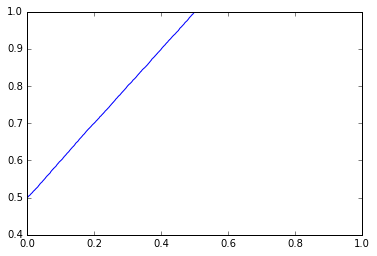

In [9]:
if __name__ == "__main__":
    num = 100000
    test_cut = np.asarray(int((num*0.))*[True] + int((num*.25))*[False])
    test_gt = np.random.randint(0,2,num)
    test_pred = np.concatenate((np.random.random(num/2) , test_gt[num/2:]))
    test_w = 1000*np.random.random(num)
    
    

if __name__ == "__main__":
    ws = [test_w]
    preds = [test_pred, test_cut]
    gt = test_gt
    weights = test_w

    pred = test_pred
    print ams(pred,gt, weights)
    print bg_rej_sig_eff(pred,gt,weights)
    
    print sig_eff_at(0.9996, pred,gt,weights)
    d= roc_vals(pred, gt, weights)
            
            

    from matplotlib import pyplot as plt

    %matplotlib inline

    plt.plot(d["fpr"], d["tpr"])



In [10]:
import h5py